Data from data/national (national2019.csv) and data/massachusetts (ma2019.csv) as dataframes

In [3]:
import pandas as pd
import numpy as np

national = pd.read_csv('../data/acs-2019-nist/national/national2019.csv')
massachusetts = pd.read_csv('../data/acs-2019-nist/massachusetts/ma2019.csv')

Data from the generated_data of the llm causal models (that succeeded)

In [13]:
from llm_schema_config import SCHEMA
columns_all = list(SCHEMA.keys())

In [14]:
national[columns_all]

,AGEP,SEX,MSP,HOUSING_TYPE,OWN_RENT,DENSITY,EDU,PINCP
0,18,2,6,3,0,2731.2,7,0.0
1,27,1,6,3,0,2731.2,7,15400.0
2,74,2,3,2,0,2731.2,9,12900.0
3,22,1,6,3,0,2731.2,7,0.0
4,18,2,6,3,0,2731.2,7,0.0
...,...,...,...,...,...,...,...,...
27248,4,2,N,1,2,16.3,2,N
27249,3,1,N,1,2,16.3,1,N
27250,0,2,N,1,2,16.3,N,N
27251,6,1,N,1,2,16.3,2,N


In [15]:
import glob
dataframes_from_llm = []
directory = "generated_data"
csv_files = glob.glob(f"{directory}/*.csv")
print(csv_files)

for csv_file in csv_files:
    df = pd.read_csv(csv_file)
    dataframes_from_llm.append(df)


['generated_data/affa0b0e.csv', 'generated_data/750981f8.csv', 'generated_data/d7fdc69c.csv', 'generated_data/979852df.csv', 'generated_data/95a7dc5c.csv', 'generated_data/d7dbc9a0.csv', 'generated_data/86848cc7.csv', 'generated_data/68e6025a.csv', 'generated_data/0e551d03.csv', 'generated_data/00ee1681.csv', 'generated_data/2707ba22.csv', 'generated_data/b2c862b5.csv', 'generated_data/64c2c0b1.csv', 'generated_data/33a1f6f8.csv', 'generated_data/5a0bd48c.csv', 'generated_data/78f1e586.csv', 'generated_data/f4b802be.csv', 'generated_data/653e2b51.csv', 'generated_data/5f4e8cf0.csv', 'generated_data/f80c66f5.csv', 'generated_data/e441a72f.csv', 'generated_data/4833f960.csv', 'generated_data/fd3d867d.csv', 'generated_data/76d11a83.csv', 'generated_data/f03eaf0d.csv', 'generated_data/4867c143.csv', 'generated_data/3a45a442.csv', 'generated_data/48bb54f0.csv', 'generated_data/9d88a081.csv', 'generated_data/4a904e49.csv']


In [21]:
def validate_and_filter_dataframes(dataframes, reference_columns):
    valid_dataframes = []
    invalid_count = 0
    reference_columns_set = set(reference_columns)

    for i, df in enumerate(dataframes):
        if set(df.columns) == reference_columns_set:
            valid_dataframes.append(df)
        else:
            invalid_count += 1
            print(f"Dataframe {i} failed validation. Columns: {df.columns}")

    print(f"num of dataframes that failed validation: {invalid_count}")

    return valid_dataframes

valid_dataframes = validate_and_filter_dataframes(dataframes_from_llm, columns_all)

Dataframe 22 failed validation. Columns: Index(['AGEP_raw', 'SEX', 'MSP', 'EDU', 'PINCP', 'HOUSING_TYPE', 'OWN_RENT',
       'DENSITY'],
      dtype='object')
num of dataframes that failed validation: 1


In [22]:
valid_dataframes

[          AGEP  SEX  EDU         PINCP  MSP  HOUSING_TYPE  OWN_RENT  \
 0    45.411152  0.0   10   2478.941895    0             1         1   
 1    40.876343  1.0   11  40438.292969    3             2         2   
 2    79.988457  0.0    0  12516.379883    1             1         2   
 3    50.257740  1.0    1  21876.742188    1             0         1   
 4    50.674568  0.0    9   6637.327148    1             2         2   
 ..         ...  ...  ...           ...  ...           ...       ...   
 995  77.293312  1.0    5  80174.648438    3             0         2   
 996  42.068596  1.0    3  14184.621094    2             1         2   
 997  73.701759  1.0   10   2985.629639    1             1         2   
 998  16.831562  0.0   11  17602.328125    4             1         0   
 999  61.568600  1.0    0  38242.273438    5             0         1   
 
          DENSITY  
 0    1062.889648  
 1    1134.051147  
 2    1004.810120  
 3     889.745850  
 4     909.445801  
 ..           

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scienceplots

def plot_columns_with_comparison(ground_truth, valid_dataframes):
    num_valid = len(valid_dataframes)
    columns = ground_truth.columns
    plt.style.use(['science', 'no-latex'])
    
    for col in columns:
        print(col)
        plt.figure(figsize=(8, 6))
        unique_vals = ground_truth[col].nunique()
        
        if unique_vals < 20:
            sns.histplot(ground_truth[col], discrete=True, stat='density', color='blue', label='groundtruth', alpha=0.7)
            valid_data_combined = pd.concat([df[col].value_counts(normalize=True).reindex(ground_truth[col].unique(), fill_value=0) for df in valid_dataframes], axis=1)
            avg_valid_density = valid_data_combined.mean(axis=1)
            std_valid_density = valid_data_combined.std(axis=1)

            avg_valid_density.plot(kind='bar', yerr=std_valid_density, alpha=0.3, color='orange', label='llm avg & std', width=0.4)

            plt.title(f"histogram for '{col}' (categorical)")
            plt.legend()
        else:
            sns.kdeplot(ground_truth[col], color='blue', label='groundtruth', fill=True)
            for i, valid_df in enumerate(valid_dataframes):
                sns.kdeplot(valid_df[col], color='orange', alpha=0.1, label=f'llm {i+1}' if i == 0 else None)

            plt.title(f"density Plot for '{col}' (continuous)")
            plt.legend()
        
        if col in ["DENSITY", "PINCP"]:
            plt.yscale('log')

        if col == "PINCP":
            max_val = ground_truth[col].max()
            plt.xlim([0, max_val])

        plt.show()


AGEP


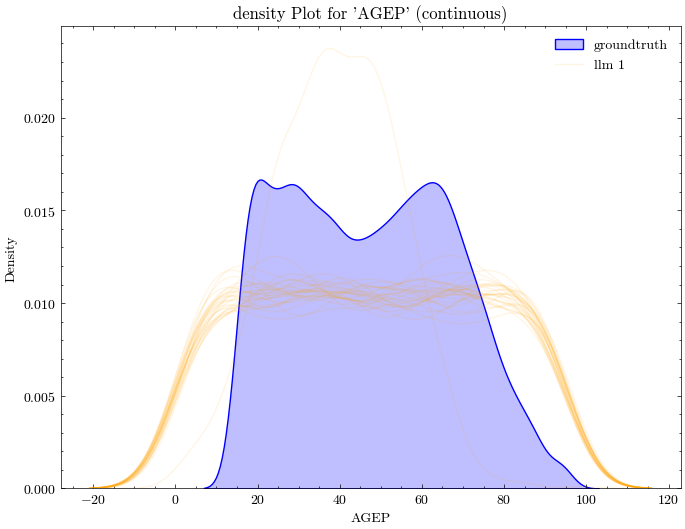

SEX


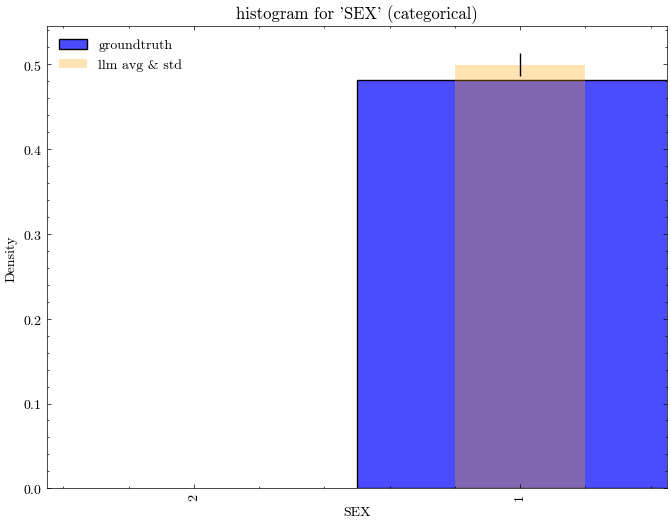

MSP


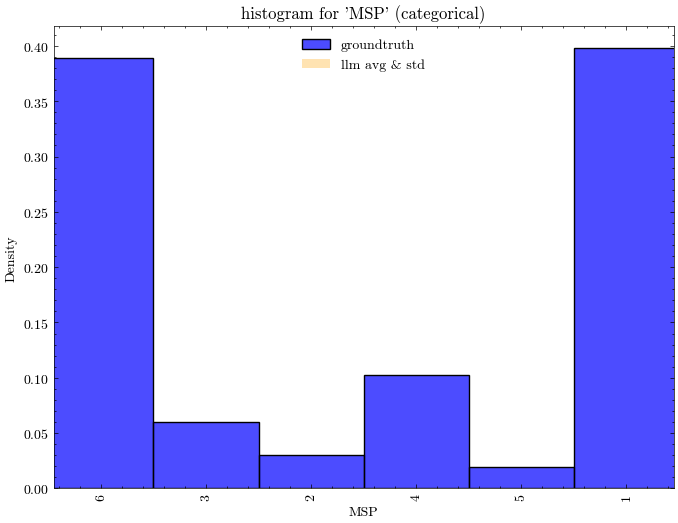

HOUSING_TYPE


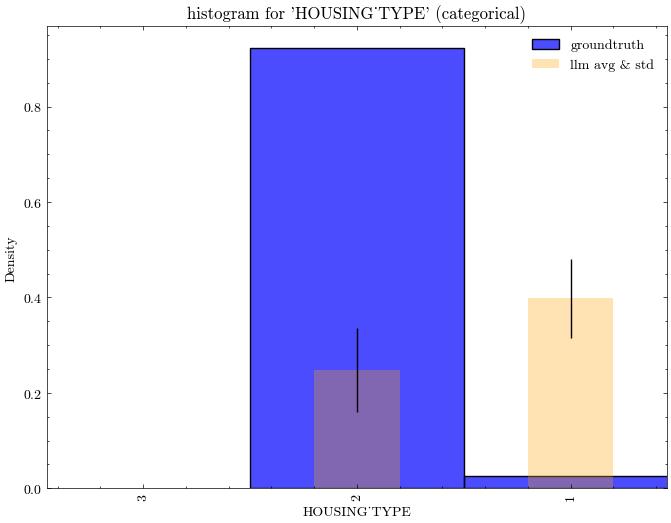

OWN_RENT


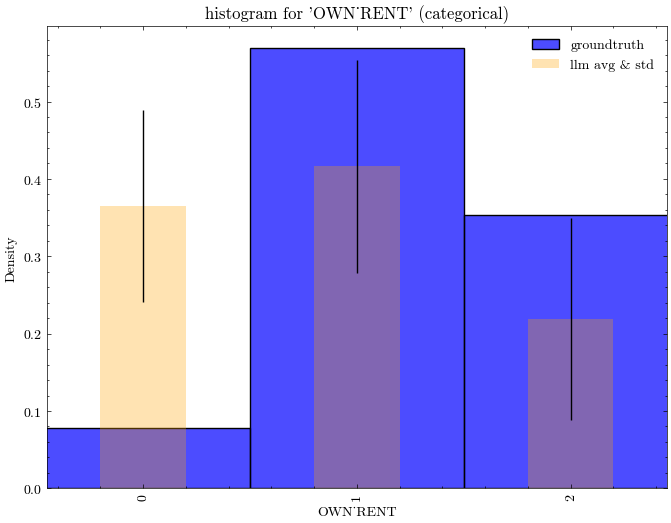

DENSITY


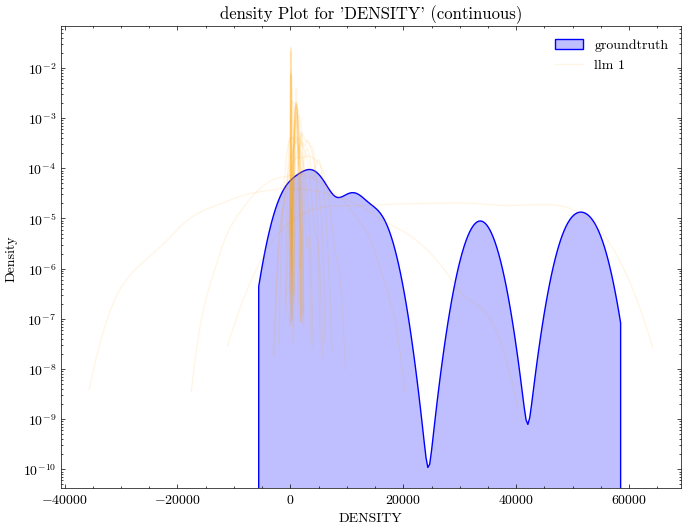

EDU


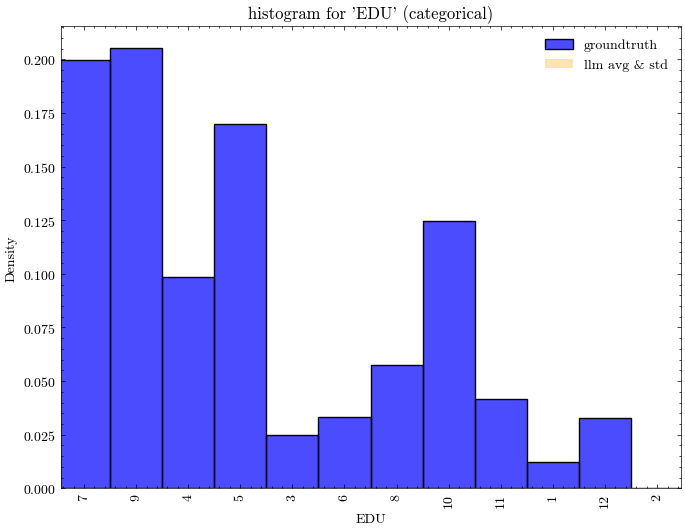

PINCP


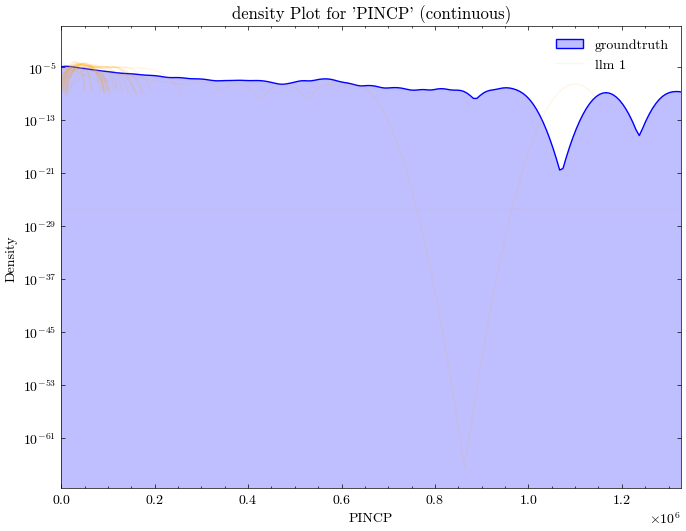

In [61]:
filtered = national[columns_all]
filtered = filtered[filtered['PINCP'] != 'N']
filtered['PINCP'] = pd.to_numeric(filtered['PINCP'])
plot_columns_with_comparison(filtered, valid_dataframes)

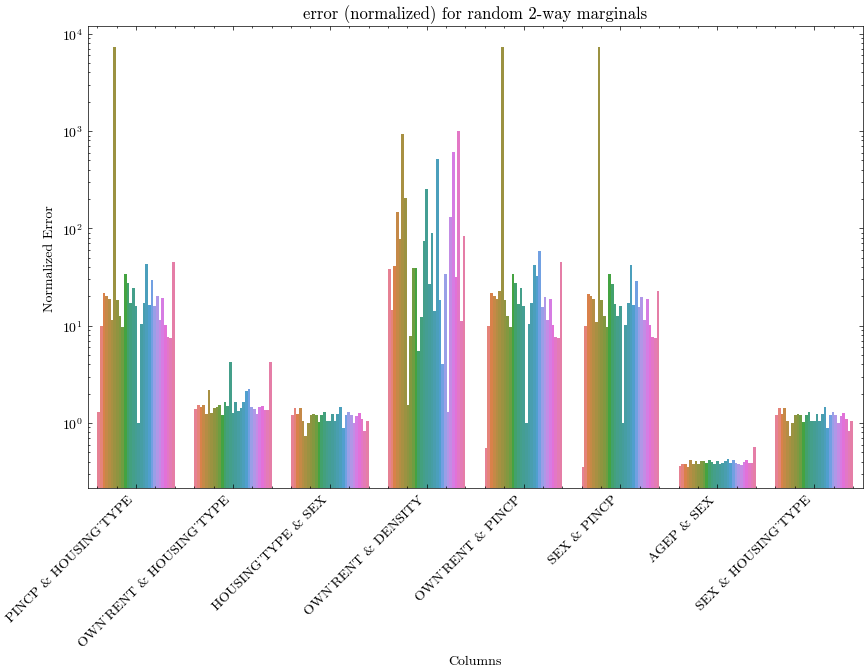

In [71]:
import pandas as pd
import numpy as np
import random
import seaborn as sns
import matplotlib.pyplot as plt

def calculate_2way_marginals(df, col1, col2):
    marginal, _, _ = np.histogram2d(df[col1], df[col2], bins=10, density=True)
    return marginal

def compare_marginals(national, valid_dataframes, num_tests=10):
    errors = []
    continuous_columns = national.select_dtypes(include=[np.number]).columns

    for _ in range(num_tests):
        col1, col2 = random.sample(list(continuous_columns), 2)
        national_marginal = calculate_2way_marginals(national, col1, col2)
        test_errors = []
        
        for valid_df in valid_dataframes:
            valid_marginal = calculate_2way_marginals(valid_df, col1, col2)
            
            absolute_error = np.abs(national_marginal - valid_marginal).sum()
            
            normalization_factor = national_marginal.sum()
            if normalization_factor > 0:
                normalized_error = absolute_error / normalization_factor
            else:
                normalized_error = 0 # avoid div by 0
            
            test_errors.append(normalized_error)
        
        errors.append((f'{col1} & {col2}', test_errors))
    
    error_df = pd.DataFrame({
        'Columns': [col for col, _ in errors],
        **{f'Validation {i+1}': [e[i] for _, e in errors] for i in range(len(valid_dataframes))}
    })

    return error_df

def plot_normalized_errors(error_df):
    error_df_melted = error_df.melt(id_vars='Columns', var_name='Validation', value_name='Normalized Error')
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Columns', y='Normalized Error', hue='Validation', data=error_df_melted)
    plt.xticks(rotation=45, ha='right')
    plt.legend([],[], frameon=False)
    plt.title("error (normalized) for random 2-way marginals")
    plt.yscale('log')
    plt.show()

error_df = compare_marginals(filtered, valid_dataframes, num_tests=10)
plot_normalized_errors(error_df)
